## spacy_text_classification

In [4]:
import spacy

nlp = spacy.load("en_core_web_lg")

import pandas as pd

In [5]:
df = pd.read_json("news_dataset.json")

In [6]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [7]:
df.shape

(12695, 2)

In [9]:
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [ ]:
## 

In [22]:
crime = df[df['category'] == "CRIME"].sample(1381)
sports = df[df['category'] == "SPORTS"].sample(1381)
Business = df[df['category'] == "BUSINESS"].sample(1381)
science = df[df['category']== "SCIENCE"]

In [23]:
df1 = pd.concat([crime,sports,Business,science],axis=0)

In [24]:
df1

,text,category
4472,Cop Spends 2 Months Working Undercover At Burg...,CRIME
1533,32 Prison Guards Fired Amid Outrage Over Inmat...,CRIME
2630,Registered Sex Offender Allegedly Caught Worki...,CRIME
11786,Father Of 3 Girls Abused By Larry Nassar Tries...,CRIME
5361,David & Me Chronicles Rubin Carter's Fight to ...,CRIME
...,...,...
12632,New Continent Zealandia Is Discovered Underwat...,SCIENCE
12644,Smartphone Lovers More Likely To Forget Things...,SCIENCE
12669,Ambitious Test On Tap For Real-Life 'Flying Sa...,SCIENCE
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE


In [25]:
df1['category'].value_counts()

CRIME       1381
SPORTS      1381
BUSINESS    1381
SCIENCE     1381
Name: category, dtype: int64

In [27]:
df1['label_num'] = df['category'].map({'CRIME': 0, 'SPORTS': 1, 'BUSINESS': 2,"SCIENCE": 3})


In [28]:
df1.head()

,text,category,label_num
4472,Cop Spends 2 Months Working Undercover At Burg...,CRIME,0
1533,32 Prison Guards Fired Amid Outrage Over Inmat...,CRIME,0
2630,Registered Sex Offender Allegedly Caught Worki...,CRIME,0
11786,Father Of 3 Girls Abused By Larry Nassar Tries...,CRIME,0
5361,David & Me Chronicles Rubin Carter's Fight to ...,CRIME,0


## Preprocess the text

In [29]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [33]:
df1['preprocessed_text'] = df1['text'].apply(lambda text: preprocess(text))


In [34]:
df1.head()

,text,category,label_num,preprocessed_text
4472,Cop Spends 2 Months Working Undercover At Burg...,CRIME,0,cop spend 2 month Working Undercover Burger Ki...
1533,32 Prison Guards Fired Amid Outrage Over Inmat...,CRIME,0,32 Prison Guards fire amid outrage Inmate abuse
2630,Registered Sex Offender Allegedly Caught Worki...,CRIME,0,register sex offender allegedly catch Working ...
11786,Father Of 3 Girls Abused By Larry Nassar Tries...,CRIME,0,Father 3 girl abuse Larry Nassar try attack Co...
5361,David & Me Chronicles Rubin Carter's Fight to ...,CRIME,0,David Chronicles Rubin Carter fight free David...


## Get the spacy embeddings for each preprocessed text

In [37]:
df1['vector'] = df1['preprocessed_text'].apply(lambda x: nlp(x).vector)

In [38]:
df1.head(5)

,text,category,label_num,preprocessed_text,vector
4472,Cop Spends 2 Months Working Undercover At Burg...,CRIME,0,cop spend 2 month Working Undercover Burger Ki...,"[-0.47465503, -1.6749907, -1.541578, 2.1127243..."
1533,32 Prison Guards Fired Amid Outrage Over Inmat...,CRIME,0,32 Prison Guards fire amid outrage Inmate abuse,"[-1.2402613, -0.4319775, -0.8546501, 2.4027958..."
2630,Registered Sex Offender Allegedly Caught Worki...,CRIME,0,register sex offender allegedly catch Working ...,"[-0.70547575, -0.71199733, -0.7324689, 0.02349..."
11786,Father Of 3 Girls Abused By Larry Nassar Tries...,CRIME,0,Father 3 girl abuse Larry Nassar try attack Co...,"[-0.81796867, -1.071301, -1.6527829, 0.2016591..."
5361,David & Me Chronicles Rubin Carter's Fight to ...,CRIME,0,David Chronicles Rubin Carter fight free David...,"[-0.90160364, 0.45512724, -1.2568977, 1.124486..."


## Train-Test splitting



In [39]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df1.vector.values, 
    df1.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df1.label_num
)

### Reshape the X_train and X_test so as to fit for models



In [41]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)


In [43]:
X_train_2d

array([[ 0.03095869,  0.8332773 , -0.33489284, ..., -0.73550427,
        -2.1031032 ,  1.3322728 ],
       [-1.2294525 , -1.3427999 , -2.5964887 , ..., -0.7594257 ,
        -1.6533849 ,  1.3537633 ],
       [-1.0247782 ,  0.6423838 ,  0.18924412, ..., -1.4604032 ,
        -0.5714494 ,  0.64133114],
       ...,
       [-2.4528732 , -1.44428   , -3.1398833 , ..., -2.94882   ,
         0.11791333, -0.85885334],
       [-0.8269908 ,  0.61809164, -1.6619991 , ..., -0.7525367 ,
        -1.3240949 ,  1.7089282 ],
       [-1.3106201 ,  1.473043  , -2.6764333 , ..., -1.8536516 ,
        -1.9657301 ,  1.1303643 ]], dtype=float32)

## DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       276
           1       0.65      0.65      0.65       277
           2       0.64      0.61      0.62       276
           3       0.59      0.65      0.62       276

    accuracy                           0.64      1105
   macro avg       0.64      0.64      0.64      1105
weighted avg       0.64      0.64      0.64      1105



## MultinomialNB

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       276
           1       0.76      0.78      0.77       277
           2       0.69      0.75      0.72       276
           3       0.76      0.71      0.73       276

    accuracy                           0.77      1105
   macro avg       0.77      0.77      0.77      1105
weighted avg       0.77      0.77      0.77      1105



## KNeighborsClassifier

In [50]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       276
           1       0.84      0.80      0.82       277
           2       0.73      0.81      0.77       276
           3       0.91      0.70      0.79       276

    accuracy                           0.80      1105
   macro avg       0.81      0.80      0.80      1105
weighted avg       0.81      0.80      0.80      1105



## RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       276
           1       0.85      0.84      0.84       277
           2       0.78      0.77      0.78       276
           3       0.78      0.82      0.80       276

    accuracy                           0.82      1105
   macro avg       0.82      0.82      0.82      1105
weighted avg       0.82      0.82      0.82      1105



## GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       276
           1       0.86      0.88      0.87       277
           2       0.82      0.85      0.83       276
           3       0.84      0.84      0.84       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



## Print the confusion Matrix with the best model got



Text(95.72222222222221, 0.5, 'Truth')

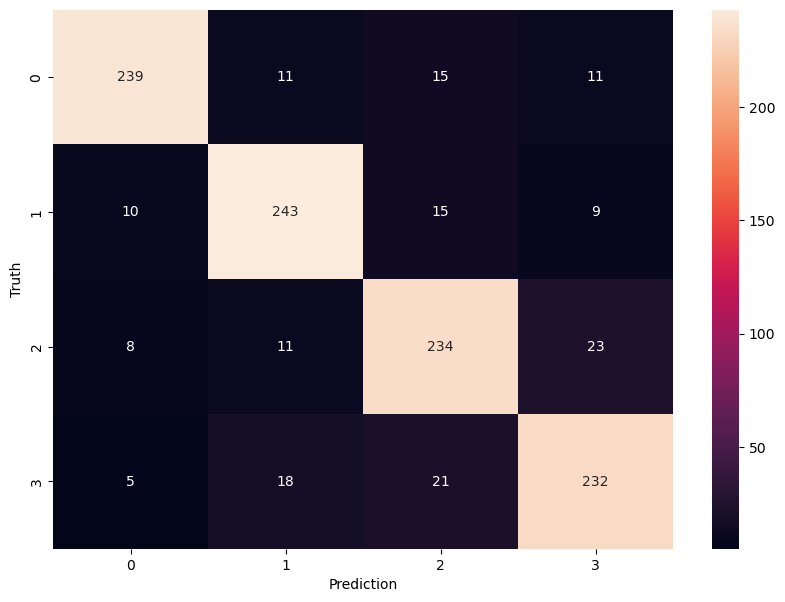

In [56]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')